# Proyecto de Sistema de predicción de ventas

In [56]:
import pandas as pd
import numpy as np

# Cargar el conjunto de datos desde la URL
url_datos = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df_ventas = pd.read_csv(url_datos)


df_ventas


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [57]:
import pandas as pd

# Renombrar columnas
df_ventas = df_ventas.rename(columns={"date": "fecha", "sales": "ventas"})

# Convertir la columna 'fecha' al tipo datetime
df_ventas["fecha"] = pd.to_datetime(df_ventas["fecha"])

# Establecer 'fecha' como índice
df_ventas = df_ventas.set_index("fecha")

# Extraer la serie temporal de ventas
serie_ventas = df_ventas["ventas"]
serie_ventas.head()


fecha
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: ventas, dtype: float64

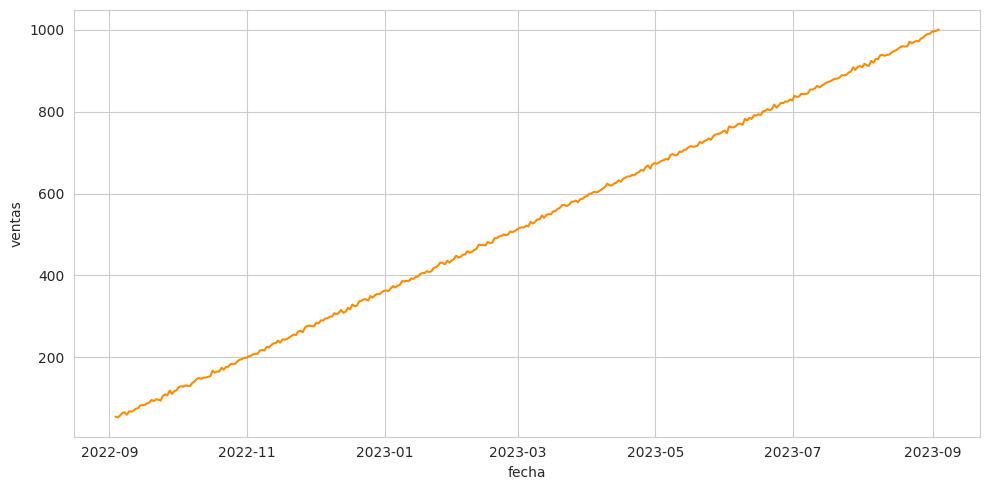

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y el eje
figura, eje = plt.subplots(figsize=(10, 5))

# Dibujar la línea de la serie temporal
sns.lineplot(data=serie_ventas, ax=eje, color="darkorange")

# Ajustar el diseño
plt.tight_layout()

plt.show()



La gráfica muestra una evolución constante y creciente de las ventas a lo largo del tiempo, desde septiembre de 2022 hasta septiembre de 2023. La tendencia es claramente lineal y ascendente, lo que indica un crecimiento sostenido y saludable en el volumen de ventas sin fluctuaciones importantes ni caídas notables. Esta estabilidad sugiere una demanda constante del producto o servicio ofrecido, y una buena gestión comercial que ha permitido mantener una trayectoria positiva durante todo el periodo analizado.

In [59]:
#Descomponer la serie
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición estacional de la serie de ventas
descomposicion = seasonal_decompose(serie_ventas, period=12)

# Mostrar el objeto de descomposición
descomposicion


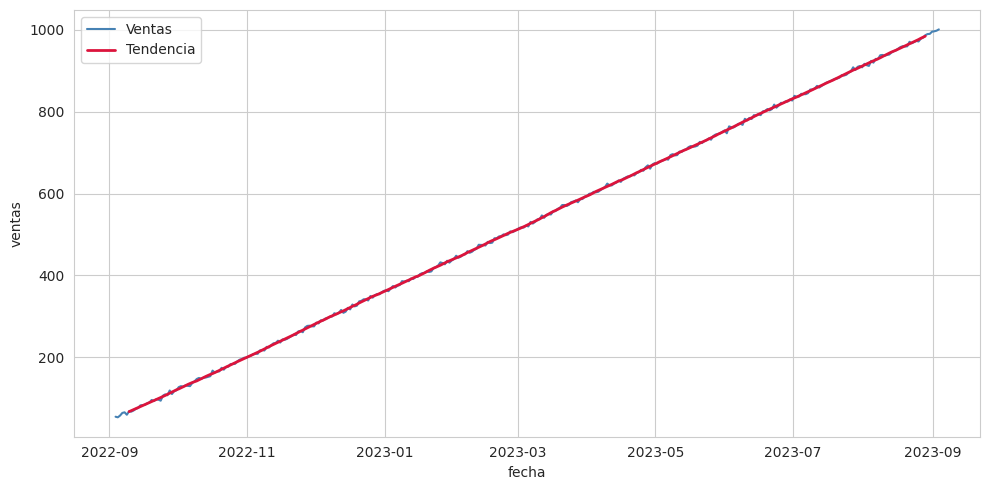

In [60]:
# Extraer la tendencia de la descomposición
tendencia = descomposicion.trend

# Crear la figura y eje
figura, eje = plt.subplots(figsize=(10, 5))

# Dibujar la serie original y la tendencia
sns.lineplot(data=serie_ventas, ax=eje, label="Ventas", color="steelblue")
sns.lineplot(data=tendencia, ax=eje, label="Tendencia", color="crimson", linewidth=2)

# Añadir leyenda y mejorar diseño
eje.legend()
plt.tight_layout()


plt.show()


La gráfica presenta la evolución de las ventas en el tiempo junto con su línea de tendencia, destacando un crecimiento constante y lineal desde septiembre de 2022 hasta septiembre de 2023. La línea azul representa los datos reales de ventas, mientras que la línea roja, correspondiente a la tendencia, se ajusta de manera casi perfecta al comportamiento observado, lo que indica una progresión muy estable y predecible. Se refleja un desempeño positivo y sostenido en las ventas

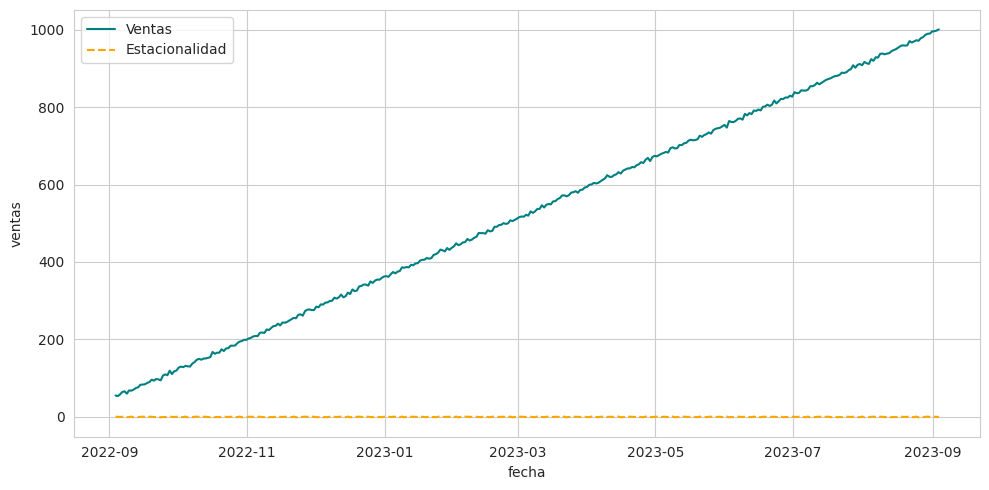

In [61]:
# Extraer el componente estacional
estacional = descomposicion.seasonal

# Crear la figura y el eje
figura, eje = plt.subplots(figsize=(10, 5))

# Dibujar la serie original y la estacionalidad
sns.lineplot(data=serie_ventas, ax=eje, label="Ventas", color="teal")
sns.lineplot(data=estacional, ax=eje, label="Estacionalidad", color="orange", linestyle="--")

# Añadir leyenda y diseño
eje.legend()
plt.tight_layout()


plt.show()


La gráfica muestra la evolución de las ventas en el tiempo junto con un componente de estacionalidad, evidenciado por la línea punteada naranja. Las ventas siguen una trayectoria creciente y sostenida desde septiembre de 2022 hasta septiembre de 2023, sin interrupciones ni caídas relevantes. En contraste, la línea de estacionalidad se mantiene prácticamente plana en torno al valor cero, lo que indica que no se identifican patrones estacionales significativos que influyan en las ventas durante el periodo analizado. Esto sugiere que el comportamiento de las ventas está determinado principalmente por una tendencia de crecimiento constante.

In [62]:
from statsmodels.tsa.stattools import adfuller

# Función para probar la estacionariedad con el test de Dickey-Fuller
def probar_estacionariedad(serie_temporal):
    print("Resultados del test de Dickey-Fuller:")
    resultado_test = adfuller(serie_temporal, autolag="AIC")
    salida_df = pd.Series(resultado_test[0:4], index=["Estadístico de Prueba", "Valor p", "#Lags Usados", "Número de Observaciones Usadas"])
    for clave, valor in resultado_test[4].items():
        salida_df["Valor Crítico (%s)" % clave] = valor
    return salida_df

# Aplicar la prueba de estacionariedad a la serie de ventas
probar_estacionariedad(serie_ventas)


Resultados del test de Dickey-Fuller:


Estadístico de Prueba               0.545414
Valor p                             0.986190
#Lags Usados                       13.000000
Número de Observaciones Usadas    352.000000
Valor Crítico (1%)                 -3.449065
Valor Crítico (5%)                 -2.869786
Valor Crítico (10%)                -2.571163
dtype: float64

El resultado del test de Dickey-Fuller muestra un estadístico de prueba de 0.545414 y un valor p de 0.986190, lo que indica que no se puede rechazar la hipótesis nula de que la serie temporal es no estacionaria. El valor p es mucho mayor que los umbrales típicos de significancia (1%, 5%, 10%), lo que sugiere que la serie tiene una raíz unitaria y presenta un comportamiento no estacionario. Además, los valores críticos para los niveles de significancia del 1%, 5% y 10% son todos menores que el estadístico de prueba, reforzando la conclusión de que la serie no es estacionaria.

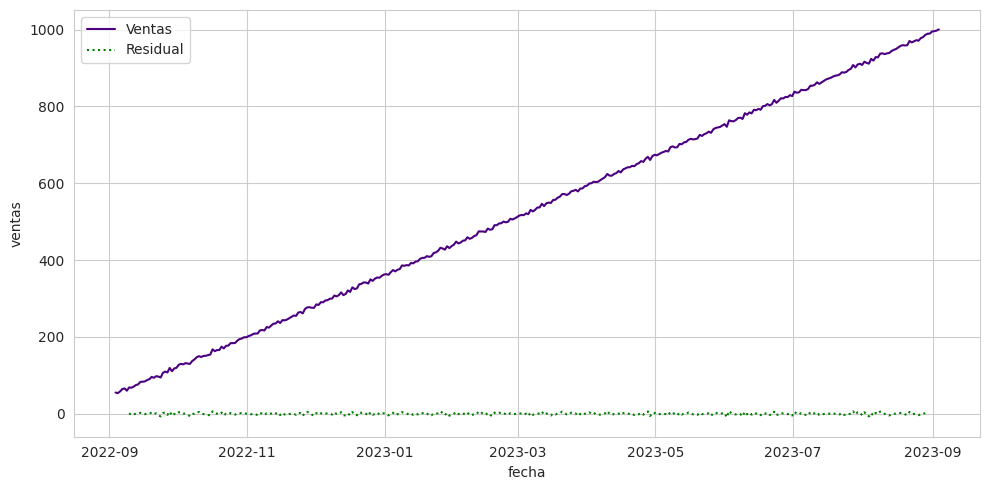

In [63]:
# Extraer el componente residual
residual = descomposicion.resid

# Crear la figura y el eje
figura, eje = plt.subplots(figsize=(10, 5))

# Dibujar la serie original y los residuales
sns.lineplot(data=serie_ventas, ax=eje, label="Ventas", color="indigo")
sns.lineplot(data=residual, ax=eje, label="Residual", color="green", linestyle=":")

# Añadir leyenda y ajustar diseño
eje.legend()
plt.tight_layout()


plt.show()


La gráfica muestra la evolución de las ventas junto con los residuos del modelo ajustado. La línea púrpura representa las ventas, que siguen una trayectoria ascendente y constante desde septiembre de 2022 hasta septiembre de 2023. Por su parte, la línea verde punteada indica los residuos, es decir, la diferencia entre los valores observados y los estimados por el modelo. Estos residuos se mantienen cercanos a cero a lo largo de todo el período, sin mostrar patrones sistemáticos ni variaciones significativas, lo cual sugiere que el modelo captura adecuadamente la tendencia general de los datos.

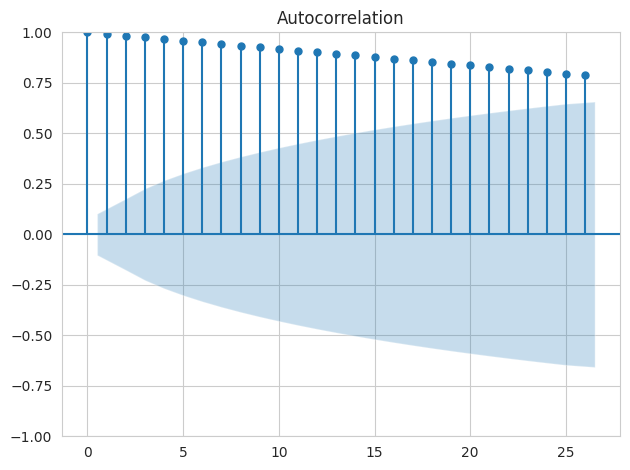

In [64]:
from statsmodels.graphics.tsaplots import plot_acf

# Graficar la función de autocorrelación
plot_acf(serie_ventas)


plt.tight_layout()


plt.show()


La gráfica de autocorrelación muestra valores significativamente altos y positivos en todos los rezagos analizados, lo cual indica una fuerte correlación temporal entre las observaciones de la serie de tiempo. Esta persistencia sugiere que el valor de las ventas en un periodo está altamente influenciado por los valores anteriores.

In [67]:
import numpy as np
print(np.__version__)

2.2.5


In [68]:
from pmdarima import auto_arima

# Ajustar el modelo ARIMA
model = auto_arima(serie_ventas, seasonal=False, trace=True, m=12)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject